In [2]:
import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/Project_Stock/'

os.chdir(current_path)

### **Requirements**

In [1]:
# pickle.format_version
# print(pd.show_versions())
!pip install pandas==0.25.3
!pip install plotly==4.14.1
!pip install mpl_finance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

interval = '30m'
date_path = './candlestick_concated/%s/' % interval
file_list = os.listdir(date_path)

print((file_list))

['2021-02-11 BTCUSDT.xlsx', '2021-02-11 ETHUSDT.xlsx', '2021-02-11 BCHUSDT.xlsx', '2021-02-11 XRPUSDT.xlsx', '2021-02-11 EOSUSDT.xlsx', '2021-02-11 LTCUSDT.xlsx', '2021-02-11 ETCUSDT.xlsx', '2021-02-11 LINKUSDT.xlsx', '2021-02-11 XLMUSDT.xlsx', '2021-02-11 ADAUSDT.xlsx', '2021-02-11 XMRUSDT.xlsx', '2021-02-11 SXPUSDT.xlsx', '2021-02-11 KAVAUSDT.xlsx', '2021-02-11 BANDUSDT.xlsx', '2021-02-11 DASHUSDT.xlsx', '2021-02-11 ZECUSDT.xlsx', '2021-02-11 XTZUSDT.xlsx', '2021-02-11 BNBUSDT.xlsx', '2021-02-11 ATOMUSDT.xlsx', '2021-02-11 ONTUSDT.xlsx', '2021-02-11 IOTAUSDT.xlsx', '2021-02-11 BATUSDT.xlsx', '2021-02-11 NEOUSDT.xlsx', '2021-02-11 QTUMUSDT.xlsx', '2021-02-11 WAVESUSDT.xlsx', '2021-02-11 MKRUSDT.xlsx', '2021-02-11 SNXUSDT.xlsx', '2021-02-11 DOTUSDT.xlsx', '2021-02-11 THETAUSDT.xlsx', '2021-02-11 ALGOUSDT.xlsx', '2021-02-11 KNCUSDT.xlsx', '2021-02-11 ZRXUSDT.xlsx', '2021-02-11 COMPUSDT.xlsx', '2021-02-11 OMGUSDT.xlsx', 'old', '2021-03-02 DOTUSDT.xlsx']


### **Load arima_result and check data**

In [ ]:
import pickle
import time
import datetime

from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import subplots
import plotly
plotly.io.renderers.default = 'colab'

with open('./arima_result/arima_candi_profit_result_%s.pickle' % interval, 'rb') as f:
  load_dict = pickle.load(f)

tp_list = np.arange(0.001, 0.1, 0.001)
leverage_list = np.arange(1, 11, 1)
# tp_list = [selected_tp]

for key in load_dict.keys():

  # if len(list(load_dict[key].keys())) > 3:
  #   print(list(load_dict[key].keys()))
  #   continue

  #     select coin   #
  if 'BTC' in key:
    tp = 0.021
    pass
  else:
    continue

  print(key)
  # print(load_dict[key].keys())
  

  #       tp analysis     #
  ohlcv = load_dict[key]['ohlcv']
  predictions = load_dict[key]['predictions']
  err_ranges = load_dict[key]['err_ranges']

  pr_list = load_dict[key]['pr_list']


  predictions = np.array(predictions, dtype=np.float64)
  err_ranges = np.array(err_ranges, dtype=np.float64)

  print('predictions.shape, err_ranges.shape :', predictions.shape, err_ranges.shape)

  ep = (predictions - err_ranges) * (1 / (tp + 1))
  close = ohlcv['close'].values[-len(ep):]
  low = ohlcv['low'].values[-len(ep):]

  ep = ep.reshape(-1, )
  print('len(ohlcv) :', len(ohlcv))
  print('ep.shape, close.shape :', ep.shape, close.shape)

  #     ML LIne     #

  # 필요한 데이터 : ep / close
  # ep <-- predictions + err_ranges

  #     win_lose : label     #
  label = close > ep
  trade_on = low < ep
  print(label)
  print('len(label) :', len(label))
  print('False count in label :', len(label) - sum(label))
  print('trade number :', sum(trade_on))

  # print(ep)


  plot_size = 3000
  
  close_ply = go.Scatter(y=close[-plot_size:], name='close', line={'color': 'orange'})
  low_ply = go.Scatter(y=low[-plot_size:], name='low', line={'color': 'red'})
  ep_ply = go.Scatter(y=ep[-plot_size:], name='ep', line={'color': 'blue'})

  # iplot([ep_ply, close_ply]) 

  row, col = 1, 1
  fig = subplots.make_subplots(row, col, shared_xaxes=True)

  span_shapes = list()
  maxy, miny = max(max(close), max(ep)), min(min(close), min(ep))
  # break
  for i in range(plot_size):
    if label[-plot_size:][i]:
      span_dict = dict(
            type="rect",
            xref="x",
            yref="y",
            x0="%s" % i,
            y0="%s" % miny,
            x1="%s" % (i + 1),
            y1="%s" % maxy,
            fillcolor="cyan",
            opacity=0.4,
            line_width=0,
            layer="below"
        )
      span_shapes.append(span_dict)

    # if trade_on[-plot_size:][i]:
    #   span_dict = dict(
    #         type="rect",
    #         xref="x",
    #         yref="y",
    #         x0="%s" % i,
    #         y0="%s" % miny,
    #         x1="%s" % (i + 1),
    #         y1="%s" % maxy,
    #         fillcolor="red",
    #         opacity=0.4,
    #         line_width=0,
    #         layer="below"
    #     )
    #   span_shapes.append(span_dict)
  
  fig.update_layout(template="plotly_dark", xaxis_rangeslider_visible=False, dragmode='pan', shapes=span_shapes)

  fig.append_trace(close_ply, row, col)
  # fig.append_trace(low_ply, row, col)
  fig.append_trace(ep_ply, row, col)
  fig.update_xaxes(showgrid=False)

  iplot(fig)
  
  continue
  

2021-02-11 BTCUSDT.xlsx
dict_keys(['ohlcv', 'predictions', 'err_ranges', 'max_ap_list', 'leverage_list', 'leverage_ap_list', 'tp_list', 'wr_list', 'fr_list', 'ap_list', 'pr_list', 'pr_fr_std', 'max_pr_list', 'max_pr_fr_std'])
predictions.shape, err_ranges.shape : (4913, 1) (4913, 1)
len(ohlcv) : 14448
ep.shape, close.shape : (4913,) (4913,)
[ True  True  True ...  True  True  True]
len(label) : 4913
False count in label : 30
trade number : 98


### **EDA on dataset(traded)**

In [6]:
import pickle
import time
import datetime

from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import subplots
import plotly
import mpl_finance as mf
plotly.io.renderers.default = 'colab'

with open('./arima_result/arima_test_result_%s.pickle' % interval, 'rb') as f:
  load_dict = pickle.load(f)


for key in load_dict.keys():


  #     select coin   #
  if 'BTC' in key:
    tp = 0.021
    pass
  else:
    continue

  print(key)
  

  ohlcv = load_dict[key]['ohlcv']
  predictions = load_dict[key]['predictions']
  err_ranges = load_dict[key]['err_ranges']

  predictions = np.array(predictions, dtype=np.float64)
  err_ranges = np.array(err_ranges, dtype=np.float64)

  print('predictions.shape, err_ranges.shape :', predictions.shape, err_ranges.shape)

  ohlcv = ohlcv.iloc[-len(predictions):]

  ep = (predictions - err_ranges) * (1 / (tp + 1))
  open_, high, low, close = np.split(ohlcv.iloc[:, :-1].values, 4, axis=1)

  # ep = ep.reshape(-1, )
  print('len(ohlcv) :', len(ohlcv))
  print('ep.shape, close.shape :', ep.shape, close.shape)

  #     ML LIne     #

  # 필요한 데이터 : ep / close
  # ep <-- predictions + err_ranges

  #     win_lose : label     #
  label = close > ep
  trade_on = low < ep
  c_trade_on = low / ep
  # print(label)
  print('len(label) :', len(label))
  print('False count in label :', len(label) - sum(label))
  print('trade number :', sum(trade_on))

  # print(ep)

  #           plotting        #
  plot_window = 100
  for i in range(plot_window, len(trade_on) - 1):

    if trade_on[i]:    

      cropped_ohlcv = ohlcv.iloc[i + 1 - plot_window:i + 1]  # include traded tick
      cropped_ohlcv['ep'] = ep[i + 1 - plot_window:i + 1] 

      fig = plt.figure(figsize=(10, 10))
      ax = fig.add_subplot(321)
      ohlc = cropped_ohlcv.iloc[:, :4]
      c_open, c_high, c_low, c_close = np.split(ohlc.values, 4, axis=1)

      # ohlc = df2.iloc[:, :4]
      index = np.arange(len(ohlc))
      ohlc = np.hstack((np.reshape(index, (-1, 1)), ohlc))
      mf.candlestick_ohlc(ax, ohlc, width=0.5, colorup='r', colordown='b')

      plt.plot(cropped_ohlcv['ep'].values)


      #     Resistance    #
      # print(c_high)
      resistance = c_high / c_close
      print(c_high[-1], c_close[-1])
      # print(resistance)
      # break

      #     Support     #
      support = c_close / c_low

      #     매도 / 매수세   #
      body = c_close / c_open

      plt.subplot(322)
      plt.plot(resistance, label='resistance')
      plt.title('%s' % resistance[-1])
      plt.legend()
      
      plt.subplot(324)
      plt.plot(support, label='support')
      plt.title('%s' % support[-1])
      plt.legend()
      
      plt.subplot(326)
      plt.plot(body, label='body')
      plt.title('%s' % body[-1])
      plt.legend()


      plt.subplot(323)
      plt.plot(cropped_ohlcv['volume'].values, label='volume')      
      plt.legend()

      plt.show()
      

      # #       win case      #
      # if label[i]:
        

      # #       lose case       #
      # else:

  
  
  continue
  

Output hidden; open in https://colab.research.google.com to view.

### **Keep Connection**

In [ ]:
while 1: 1

### **Set data structure** 

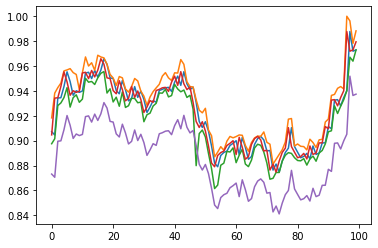

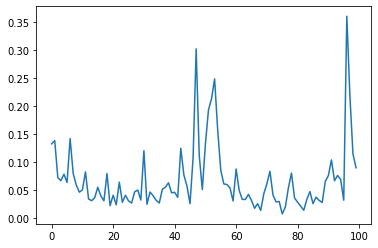

x.shape, y.shape : (4912, 6) (4912,)
t_x.shape, t_y.shape, t_pr_list.shape : (98, 6) (98,) (98, 1)


In [ ]:
def min_max_scaler(x):
    scaled_x = (x - x.min()) / (x.max() - x.min())
    return scaled_x


# input features (ohlcv)
d_ohlcv = ohlcv.iloc[-len(ep):].values

# scaler (ohlc + ep | volume)
d_ohlc = min_max_scaler(np.hstack((d_ohlcv[:, :-1], ep.reshape(-1, 1))))
d_volume = min_max_scaler(d_ohlcv[:, -1:])

#     check data    #
plt.plot(d_ohlc[-100:])
plt.show()

plt.plot(d_volume[-100:])
plt.show()

#     make train_test dataset     #
#     previous period : 1
x = np.hstack((d_ohlc, d_volume))[:-1]
y = label[1:]
ml_pr_list = pr_list[1:]

#     using only trade_on data    #
t_x = []
t_y = []
t_pr_list = []
for i in range(len(trade_on[1:])):
  
  if trade_on[1:][i]:
    t_x.append(x[i])
    t_y.append(y[i])
    t_pr_list.append(ml_pr_list[i])
    # print('x[i] :', x[i])

t_x = np.array(t_x)
t_y = np.array(t_y)
t_pr_list = np.array(t_pr_list)
print('x.shape, y.shape :', x.shape, y.shape)
print('t_x.shape, t_y.shape, t_pr_list.shape :', t_x.shape, t_y.shape, t_pr_list.shape)

# plt.scatter(x[:, [0]], y)


### **Check data correleation**

       open      high       low     close    volume        ep  trade_on
0  0.020166  0.021083  0.019891  0.020197  0.011279  0.008809  0.945977
1  0.020197  0.021483  0.020071  0.020747  0.011309  0.014997  0.939801
2  0.020747  0.022803  0.020354  0.022371  0.011848  0.050353  0.924543
3  0.022371  0.022995  0.021315  0.021568  0.013440  0.031507  0.927117
4  0.021568  0.021699  0.020625  0.021246  0.012653  0.017730  0.911826
              open      high       low     close    volume        ep  trade_on
open      1.000000  0.999789  0.999765  0.999624  0.999990 -0.001176 -0.046514
high      0.999789  1.000000  0.999650  0.999839  0.999781  0.006688 -0.049233
low       0.999765  0.999650  1.000000  0.999767  0.999747 -0.012360 -0.040583
close     0.999624  0.999839  0.999767  1.000000  0.999611 -0.001317 -0.044841
volume    0.999990  0.999781  0.999747  0.999611  1.000000 -0.000682 -0.047694
ep       -0.001176  0.006688 -0.012360 -0.001317 -0.000682  1.000000 -0.322397
trade_on -0.046

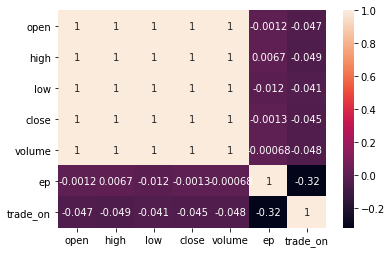

In [ ]:
import seaborn as sns

columns = ['open', 'high', 'low', 'close', 'volume', 'ep', 'label']

#     y <-- trade_on ver.     #
columns = ['open', 'high', 'low', 'close', 'volume', 'ep', 'trade_on']
y = trade_on[1:]
y = min_max_scaler(c_trade_on[1:])

d_set = np.hstack((x, y.reshape(-1, 1)))
df = pd.DataFrame(columns=columns, data=d_set)
print(df.head())

corr = df.corr()
print(corr)

sns.heatmap(corr, annot=True)

### **Set ML models**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


#       trade_on data base      #
x, y = t_x, t_y

seed = 7
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=False)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)


from sklearn.utils.testing import all_estimators
from sklearn.metrics import accuracy_score, classification_report

allAlgorithms = all_estimators(type_filter='classifier')

#       Check Best Perfomance Model     #
scores = list()
names = list()
for(name, algorithm) in allAlgorithms:

  try:
    clf = algorithm()
    # clf = algorithm(class_weight='balanced')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('score :', accuracy_score(y_test, y_pred), name)
    names.append(name)
    scores.append(accuracy_score(y_test, y_pred))

  except Exception as e:
    print(e)

acc_series = pd.Series(index=names, data=scores).sort_values(ascending=False)
print(acc_series.head())


score : 0.6 AdaBoostClassifier
score : 0.3333333333333333 BaggingClassifier
score : 0.6 BernoulliNB
score : 0.5666666666666667 CalibratedClassifierCV
score : 0.6 CategoricalNB
score : 0.4 CheckingClassifier
__init__() missing 1 required positional argument: 'base_estimator'
score : 0.5333333333333333 ComplementNB
score : 0.4 DecisionTreeClassifier
score : 0.5666666666666667 DummyClassifier
score : 0.43333333333333335 ExtraTreeClassifier
score : 0.5333333333333333 ExtraTreesClassifier
score : 0.5333333333333333 GaussianNB
score : 0.6 GaussianProcessClassifier
score : 0.5666666666666667 GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning:

The default value of strategy will change from stratified to prior in 0.24.



score : 0.6 HistGradientBoostingClassifier
score : 0.6 KNeighborsClassifier
score : 0.5333333333333333 LabelPropagation
score : 0.5333333333333333 LabelSpreading
score : 0.5666666666666667 LinearDiscriminantAnalysis
score : 0.6 LinearSVC
score : 0.6 LogisticRegression
score : 0.6 LogisticRegressionCV
score : 0.6 MLPClassifier
__init__() missing 1 required positional argument: 'estimator'
score : 0.6 MultinomialNB
score : 0.4 NearestCentroid
score : 0.5333333333333333 NuSVC
__init__() missing 1 required positional argument: 'estimator'
__init__() missing 1 required positional argument: 'estimator'
__init__() missing 1 required positional argument: 'estimator'
score : 0.6 PassiveAggressiveClassifier
score : 0.6 Perceptron
score : 0.6333333333333333 QuadraticDiscriminantAnalysis
score : 0.6 RadiusNeighborsClassifier
score : 0.5333333333333333 RandomForestClassifier
score : 0.6 RidgeClassifier
score : 0.6 RidgeClassifierCV
score : 0.4 SGDClassifier
score : 0.6 SVC
__init__() missing 1 requ

### **Use Best Model**


precision : 0.6521739130434783
recall : 0.8333333333333334



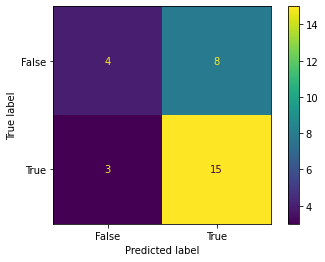


win ratio improvement 0.60 --> 0.65


In [ ]:
best_model = 'QuadraticDiscriminantAnalysis'
# best_model = acc_series.index[0]

for name, model in allAlgorithms:
  if name == best_model:
    best_model = model()
    # best_model = model(class_weight='balanced')
    best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
# print(y_pred)

#     compare precision     #
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('precision :', precision_score(y_test, y_pred))
print('recall :', recall_score(y_test, y_pred))
print()

plot_confusion_matrix(best_model, x_test, y_test, normalize=None)
plt.show()  
print()

#     check win-ratio improvement     #
cmat = confusion_matrix(y_test, y_pred)
# print(cmat)
# print(np.sum(cmat, axis=1))

org_wr = np.sum(cmat, axis=1)[-1] / sum(np.sum(cmat, axis=1))
ml_wr = cmat[1][1] / np.sum(cmat, axis=0)[-1]
print('win ratio improvement %.2f --> %.2f' % (org_wr, ml_wr))

### **Adjust Prediction & Check Profit**

1.2043088750948887


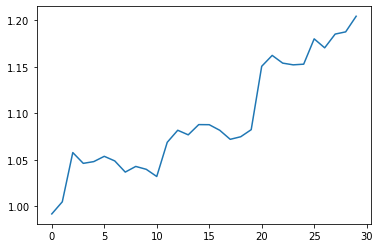

1.1872623314551398


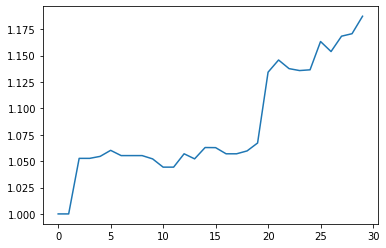

In [ ]:
test_size = len(y_test)
test_pr_list = t_pr_list[-test_size:]
print(np.cumprod(test_pr_list)[-1])
plt.plot(np.cumprod(test_pr_list))
plt.show()

# print(y_pred)
# print(test_pr_list)
pred_pr_list = np.where(y_pred == 1, test_pr_list.reshape(-1, ), 1.0)
# print(pred_pr_list)
print(np.cumprod(pred_pr_list)[-1])
plt.plot(np.cumprod(pred_pr_list))
plt.show()